<a href="https://colab.research.google.com/github/ritikagulwani/churn_modelling/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
x
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [ ]:
x=x.drop(['Geography', 'Gender'], axis=1)

In [ ]:
x.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57


In [ ]:
x=pd.concat([x, geography, gender], axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=11, activation='relu'))
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer ='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6873 - loss: 0.5953 - val_accuracy: 0.8148 - val_loss: 0.4396
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8119 - loss: 0.4419 - val_accuracy: 0.8247 - val_loss: 0.4103
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8270 - loss: 0.4045 - val_accuracy: 0.8311 - val_loss: 0.3914
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8471 - loss: 0.3684 - val_accuracy: 0.8391 - val_loss: 0.3795
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8545 - loss: 0.3615 - val_accuracy: 0.8444 - val_loss: 0.3745
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8483 - loss: 0.3585 - val_accuracy: 0.8436 - val_loss: 0.3706
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8560 - loss: 0.3369 - val_accuracy: 0.8444 - val_loss: 0.3697
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8434 - loss: 0.3583 -

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

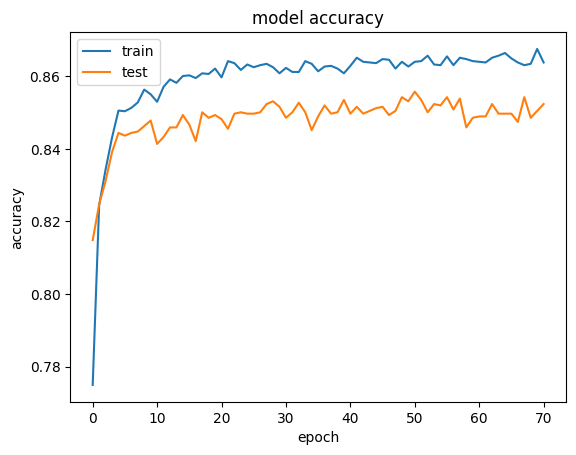

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred =(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1500,   95],
       [ 196,  209]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8545